In [3]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


In [9]:
dir = "D:/E-just/PROG STUDY/ML/dog vs cat/train"
categories = ['cat', 'dog']
data = []

In [10]:
#loading and reshaping the data
for category in categories:
    path = os.path.join(dir, category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imagepath = os.path.join(path,img)
        pet_img = cv2.imread(imagepath,0)
        try:
            pet_img = cv2.resize(pet_img,(50,50))
            image = np.array(pet_img).flatten()
            data.append([image,label])
        except Exception as e:
            pass
    
    print(len(data))

12500
25000


In [11]:
#saving the processed image data to a file using Python’s pickle module.
pick_in = open('data1.pickle', 'wb')
pickle.dump(data, pick_in)
pick_in.close()

In [12]:
#load data
pick_in = open('data1.pickle', 'rb')
data = pickle.load(pick_in)
pick_in.close()

In [14]:
#shuffel data
random.shuffle(data)
features= []
labels= []

for feature, label in data:
    features.append(feature)
    labels.append(label)

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size=0.25) 

In [10]:
model = SVC(C=1, kernel='poly', gamma= 'auto')

In [11]:
model.fit(xtrain,ytrain)
pick= open('model.sav', 'wb')
pickle.dump(model,pick)
pick.close()

In [5]:
pick = open('model.sav', 'rb')
model =pickle.load(pick)
pick.close()

In [16]:
prediction = model.predict(xtest)

In [17]:
accuracy = model.score(xtest, ytest)

In [19]:
print ("The Accuracy is: ", accuracy)

The Accuracy is:  0.9


In [20]:
print('prediction is : ', categories[prediction[0]])

prediction is :  cat


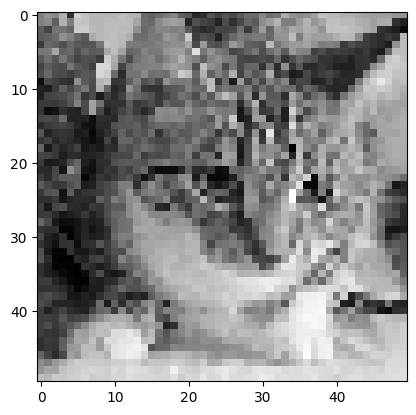

In [21]:
mypet = xtest[0].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()